# Oscilador Armónico Simple

$$\begin{aligned}
 \text{Cuantitativo:} \quad &F=m\frac{d^2x}{dt^2}=-kx  &\Rightarrow&  x(t)=A cos(\omega t+\phi)= B cos(\omega t) + C sen(\omega t)\\
 \text{Cualitativo 1:} \quad  &a_x=\frac{dv_x}{dt} \land \quad v_x=\frac{dx}{dt} &\land& \quad a_x=Minus(v_1) \land \quad v_1=Mult(k*x) \land \quad k=const(k_0)>0 \\
 \text{Cualitativo 2:} \quad  &a_x=\frac{dv_x}{dt} \land \quad v_x=\frac{dx}{dt} &\land& \quad a_x=Minus(v_1) \land \quad v_1=M^+_0(x) \quad  \\
 \text{Cualitativo 3:} \quad  &a_x=\frac{dv_x}{dt} \land \quad v_x=\frac{dx}{dt} &\land& \quad a_x=M^-_0(x) \quad \\
 \text{Cualitativo 4:} \quad & x'' = f(x),\quad \text{where } f\in M^-_0 
\end{aligned}
$$

In [12]:
#import QSIM #imports all submodules
from QSIM import * #imports all functions and classes

# Definir PSR Inicial

In [13]:
#basic landmarks
zero=landmark_value("0",0)
inf=landmark_value("inf",1,is_finite=False)
neg_inf=landmark_value("-inf",-1,is_finite=False)

one=landmark_value("1",Sign(1))

###### Variables=[t,dt,x,vx,ax], 

#time
t0=landmark_value("t0",0)
t_qs=quantity_space("t",[t0,inf])


#dt
dt_qs=quantity_space(variable="dt",landmarks_list=[zero,one])
dt_qs.set_maximum_limit(one)
dt_qs.set_minimum_limit(zero)


qv_t0=qualitative_value(t0,Sign(1))
qv_t0_none_sign=qualitative_value(t0,Sign(None))

#x
x0=landmark_value("x0",1)
x_qs=quantity_space("x",[neg_inf,zero,x0,inf])

qv_x0=qualitative_value(x0,Sign(None))


#vx
vx0=landmark_value("vx0",1)
vx_qs=quantity_space("vx",[neg_inf,zero,inf])


#ax
ax0=landmark_value("ax0",-1)
ax_qs=quantity_space("ax",[neg_inf,ax0,zero,inf])

qv_ax0=qualitative_value(ax0,Sign(None))




#Constraints
dt_x_vx=Derivative(quantity_spaces=[x_qs,vx_qs])
dt_vx_ax=Derivative(quantity_spaces=[vx_qs,ax_qs])
mminus_ax_x=Minus([ax_qs,x_qs])#M([ax_qs,x_qs],type=Sign(-1))

dt_t_dt=Derivative(quantity_spaces=[t_qs,dt_qs])
const_dt_pos=Constant(quantity_spaces=[dt_qs],current_value=one)


##### Define Q, V, C and initial state
all_q_spaces=[t_qs,x_qs,vx_qs,ax_qs,dt_qs,]#vx_squared_qs,KE_qs,PE_qs,E_qs]
V=[qs.variable for qs in all_q_spaces]

Q={}
for qs in all_q_spaces:
    Q[qs.variable]=qs

C=[dt_x_vx,dt_vx_ax,mminus_ax_x,dt_t_dt,const_dt_pos,]
   #mult_vx_vx_vx_squared,mplus_vxsq_ke,mplus_x_pe,add_ke_pe_E,const_E]

#Initial State Info

Dbar={'t':qv_t0_none_sign,'x':qv_x0,'vx':qualitative_value(zero,None),'ax':qv_ax0}
initial_conditions_state=Qualitative_State(Dbar)
#initial_conditions_state.is_complete(all_vars) #not complete
#print(initial_conditions_state)

Dbar_zero={'t':qv_t0_none_sign,'x':qualitative_value(zero,None),'vx':qualitative_value(zero,None),'ax':qualitative_value(zero,None)}
initial_conditions_state0=Qualitative_State(Dbar_zero)

In [14]:
V,Q,C,initial_conditions_state

(['t', 'x', 'vx', 'ax', 'dt'],
 {'t': t: t0 ... inf,
  'x': x: -inf ... 0 ... x0 ... inf,
  'vx': vx: -inf ... 0 ... inf,
  'ax': ax: -inf ... ax0 ... 0 ... inf,
  'dt': dt: 0 ... 1},
 [⟨ (d/dt x vx)⟩,
  ⟨ (d/dt vx ax)⟩,
  ⟨ (M- ax x)  (⟨-inf, std⟩, ⟨inf, std⟩), (⟨-inf, dec⟩, ⟨inf, inc⟩), (⟨0, dec⟩, ⟨0, inc⟩), (⟨inf, std⟩, ⟨-inf, std⟩), (⟨inf, dec⟩, ⟨-inf, inc⟩), (⟨0, std⟩, ⟨0, std⟩), (⟨inf, inc⟩, ⟨-inf, dec⟩), (⟨-inf, inc⟩, ⟨inf, dec⟩), (⟨0, inc⟩, ⟨0, dec⟩)⟩,
  ⟨ (d/dt t dt)⟩,
  ⟨ (const dt)⟩],
 {'t': ⟨t0, None⟩, 'x': ⟨x0, None⟩, 'vx': ⟨0, None⟩, 'ax': ⟨ax0, None⟩})

# Resolver PSR Inicial

In [15]:
from anytree import AsciiStyle, ContRoundStyle, ContStyle, DoubleStyle

qv_none_both=qualitative_value(None,None)
Trans_conditions=[False]
root=QSIM(V,Q,C,Trans_conditions,initial_conditions_state,time_var="t",cycle_match_criteria="strong",max_breadth=3000,max_depth=9)

for pre, fill, node in RenderTree(root,style=ContRoundStyle()): 
    if node.name["cycle_loc"]==None:
        print(str(pre)+str(node.name["loc"])+":"+str({key: node.name["State"].get(key,qv_none_both) for key in V})+" ") #make sure that dictionary is printed in the order of V
    else:
        print(str(pre)+str(node.name["loc"])+":"+str({key: node.name["State"].get(key,qv_none_both) for key in V})+" -> "+str(node.name["cycle_loc"]))

0


100%|██████████| 1/1 [00:00<00:00, 142.08it/s]


1


100%|██████████| 1/1 [00:00<00:00, 11.66it/s]


2


100%|██████████| 1/1 [00:00<00:00, 110.61it/s]


3


100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

4



100%|██████████| 1/1 [00:00<00:00, 110.79it/s]


5


100%|██████████| 1/1 [00:00<00:00,  6.99it/s]


6


100%|██████████| 1/1 [00:00<00:00, 49.06it/s]


7


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

(-1, 0):{'t': ⟨t0, None⟩, 'x': ⟨x0, None⟩, 'vx': ⟨0, None⟩, 'ax': ⟨ax0, None⟩, 'dt': ⟨None, None⟩} 
╰── (0, 0):{'t': ⟨t0, inc⟩, 'x': ⟨x0, std⟩, 'vx': ⟨0, dec⟩, 'ax': ⟨ax0, std⟩, 'dt': ⟨1, std⟩} 
    ╰── (1, 0):{'t': ⟨(t0, inf), inc⟩, 'x': ⟨(0, x0), dec⟩, 'vx': ⟨(-inf, 0), dec⟩, 'ax': ⟨(ax0, 0), inc⟩, 'dt': ⟨1, std⟩} 
        ╰── (2, 0):{'t': ⟨t1, inc⟩, 'x': ⟨0, dec⟩, 'vx': ⟨vx1, std⟩, 'ax': ⟨0, inc⟩, 'dt': ⟨1, std⟩} 
            ╰── (3, 0):{'t': ⟨(t1, inf), inc⟩, 'x': ⟨(-inf, 0), dec⟩, 'vx': ⟨(vx1, 0), inc⟩, 'ax': ⟨(0, inf), inc⟩, 'dt': ⟨1, std⟩} 
                ╰── (4, 0):{'t': ⟨t2, inc⟩, 'x': ⟨x1, std⟩, 'vx': ⟨0, inc⟩, 'ax': ⟨ax1, std⟩, 'dt': ⟨1, std⟩} 
                    ╰── (5, 0):{'t': ⟨(t2, inf), inc⟩, 'x': ⟨(x1, 0), inc⟩, 'vx': ⟨(0, inf), inc⟩, 'ax': ⟨(0, ax1), dec⟩, 'dt': ⟨1, std⟩} 
                        ╰── (6, 0):{'t': ⟨t3, inc⟩, 'x': ⟨0, inc⟩, 'vx': ⟨vx2, std⟩, 'ax': ⟨0, dec⟩, 'dt': ⟨1, std⟩} 
                            ╰── (7, 0):{'t': ⟨(t3, inf), inc⟩, 'x': ⟨(0, x0), 

In [16]:

#estado estacionario
qv_none_both=qualitative_value(None,None)
Trans_conditions=[False]
stationary_root=QSIM(V,Q,C,Trans_conditions,initial_conditions_state0,time_var="t",cycle_match_criteria="weak",max_breadth=3000,max_depth=9)

for pre, fill, node in RenderTree(stationary_root): 
    if node.name["cycle_loc"]==None:
        print(str(pre)+str(node.name["loc"])+":"+str({key: node.name["State"].get(key,qv_none_both) for key in V})+" ") #make sure that dictionary is printed in the order of V
    else:
        print(str(pre)+str(node.name["loc"])+":"+str({key: node.name["State"].get(key,qv_none_both) for key in V})+" -> "+str(node.name["cycle_loc"]))

0


100%|██████████| 1/1 [00:00<00:00, 58.34it/s]


1


0it [00:00, ?it/s]


2


0it [00:00, ?it/s]


3


0it [00:00, ?it/s]


4


0it [00:00, ?it/s]


5


0it [00:00, ?it/s]


6


0it [00:00, ?it/s]


7


0it [00:00, ?it/s]

(-1, 0):{'t': ⟨t0, None⟩, 'x': ⟨0, None⟩, 'vx': ⟨0, None⟩, 'ax': ⟨0, None⟩, 'dt': ⟨None, None⟩} 
└── (0, 0):{'t': ⟨t0, inc⟩, 'x': ⟨0, std⟩, 'vx': ⟨0, std⟩, 'ax': ⟨0, std⟩, 'dt': ⟨1, std⟩} 


# Graficar Soluciones del PSR Inicial

In [17]:
import networkx as nx
import hypernetx as hnx

constraint_name_translation_mapping={"Derivative":"Derivada","Constant":"Constante","Add":"Suma","Minus[-]":r"$M^-_0$","Plus[+]":r"$M^+_0$","U[+]":r"$U^+$","U[-]":r"$U^-$"}


def get_constraint_name(c):
    name=str(type(c)).split(".")[1]
    if isinstance(c,M) or isinstance(c,U):
        name+=str(c.type)

    new_name=name.replace("'>","")
    for key in constraint_name_translation_mapping:
        new_name=new_name.replace(key,constraint_name_translation_mapping[key])

    return new_name


def hypergraph_plot_from_C(C):
    data = {i: c.variables for i,c in enumerate(C)}
    labels={i: get_constraint_name(c) for i,c in enumerate(C)}
    H = hnx.Hypergraph(setsystem=data)
    hnx.draw(H,with_edge_counts=True,edge_labels=labels)


class HashableDict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))

c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.properties[
c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.properties[


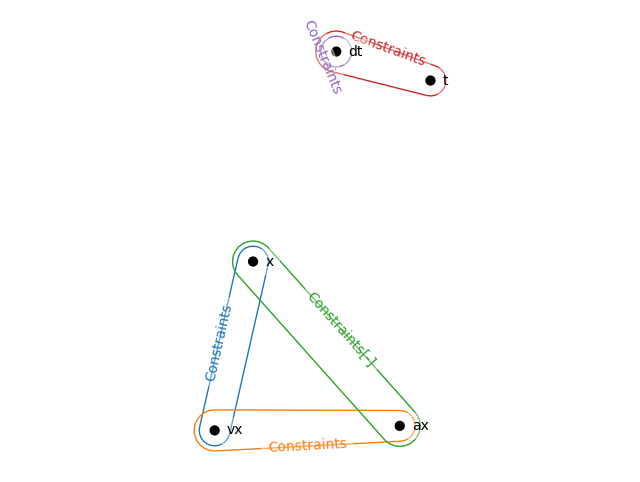

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt
data = {i: c.variables for i,c in enumerate(C)}
labels={i: get_constraint_name(c) for i,c in enumerate(C)}
H = hnx.Hypergraph(setsystem=data)

#for n in np.linspace(0.1,0.5,10):
# for n in np.arange(35,50,2):
# for n in random.choices(range(1, 101), k=10):
#     print(n)
    #fig, ax = plt.subplots(figsize=(8, 6)) #800x600
    #hnx.draw(H,with_edge_counts=True,with_color=True,edge_labels=labels,ax=ax,layout_kwargs={'k': 0.9,'seed':n})
    #plt.show()
fig, ax = plt.subplots(figsize=(8, 6)) #800x600
hnx.draw(H,with_edge_counts=True,with_color=True,edge_labels=labels,ax=ax,layout_kwargs={'k': 0.9,'seed':30,'iterations':45})
#plt.savefig('Document Figures/4PSR_osc_arm_sim.png',bbox_inches='tight', pad_inches=0)

In [19]:
stationary_behavior=get_behavior_from_leaf(stationary_root.children[0],key=None)[1:]

normal_behaviors=[]
for leaf in root.leaves:
    normal_behaviors.append(get_behavior_from_leaf(leaf,key=None)[1:])

all_behaviors=[stationary_behavior]+normal_behaviors

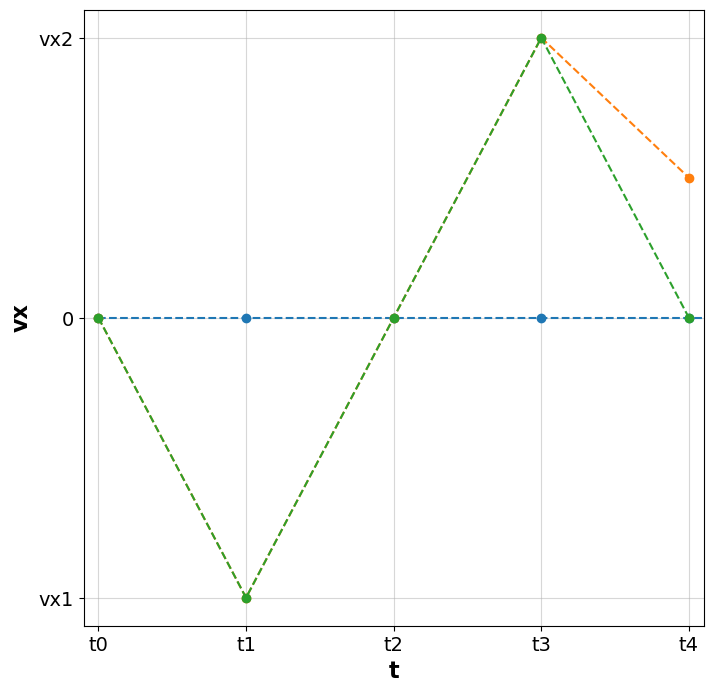

In [20]:
import random, math
import matplotlib.pyplot as plt

grid_shape=(1,1)
time_var="t"
x_var="t"
y_var="vx"
delta=0.1

x_var_landmarks=[]
y_var_landmarks=[]
for behavior in all_behaviors:
    x_var_landmarks.append(behavior[-1].name["Q"][x_var].landmarks)
    y_var_landmarks.append(behavior[-1].name["Q"][y_var].landmarks)

all_x_landmarks=x_var_landmarks[-1]
all_y_landmarks=y_var_landmarks[-2]
#select two lists
#check if one is sublist of the other
#if yes, select another, and repreat until I have the complete list
#if no, print error


plt.figure()
#plt.suptitle("test", fontsize=18, y=0.95)

for i,behavior in enumerate(all_behaviors):

    behavior_states_list=[s.name["State"] for s in behavior]#get_behavior_from_leaf(leaf_nodes[0],"State")[1:] #ommit partial initial state

    #plt.subplots_adjust(hspace=0.5,wspace=0.5)

    #i=0
    #for x_var,y_var in vars_tuples_list:
        
    #ax = plt.subplot(grid_shape[0], grid_shape[1], 0)
    #i+=1

    x_var_behavior=[s[x_var].qmag for s in behavior_states_list if s[time_var].qmag_type==landmark_value]
    y_var_behavior=[s[y_var].qmag for s in behavior_states_list if s[time_var].qmag_type==landmark_value]

    if len(y_var_behavior)==1 and len(x_var_behavior)==1:
        x_var_behavior=all_x_landmarks #used only for time, when quiescent state appears
    
    if len(set(y_var_behavior))==1: #constant value
        y_var_behavior=[y_var_behavior[0]]*len(x_var_behavior)
    elif len(set(x_var_behavior))==1: #constant value
        x_var_behavior=[x_var_behavior[0]]*len(y_var_behavior)



    x_indeces=[]
    for el in x_var_behavior:
        if type(el)==landmark_value:
            x_indeces.append(all_x_landmarks.index(el))
        else:
            index_1=all_x_landmarks.index(el[0])
            index_2=all_x_landmarks.index(el[1])
            if (index_2-index_1)==1:
                x_indeces.append( (index_1+index_2)/2 )
            else:
                raise ValueError(f"{x_var} indeces don't make sense {index_1,index_2}")
            # elif (index_2-index_1)>1:
            #     x_indeces.append(random.uniform(index_1,index_2))

    y_indeces=[]
    for el in y_var_behavior:
        if type(el)==landmark_value:
            y_indeces.append(all_y_landmarks.index(el))
        else:
            index_1=all_y_landmarks.index(el[0])
            index_2=all_y_landmarks.index(el[1])
            if (index_2-index_1)==1:
                y_indeces.append( (index_1+index_2)/2 )
            elif (index_2-index_1)>1:
                y_indeces.append(random.uniform(index_1,index_2))
            else:
                raise ValueError(f"{y_var} indeces don't make sense {index_1,index_2}")

    #x_indeces=[(all_x_landmarks.index(el[0])+all_x_landmarks.index(el[1]))/2 if type(el)==tuple else all_x_landmarks.index(el) for el in x_var_behavior]
    #print(y_var_behavior,all_y_landmarks)
    #y_indeces=[(all_y_landmarks.index(el[0])+all_x_landmarks.index(el[1]))/2 if type(el)==tuple else all_y_landmarks.index(el) for el in y_var_behavior]


    plt.plot(x_indeces, y_indeces, marker='o',linestyle='--',label=str(i)) #customize the appearance of the dashed lines by providing a dash tuple to the linestyle parameter. 
    #For example, (0, (3, 10, 1, 15)) means (3pt line, 10pt space, 1pt line, 15pt space) with no offset

plt.xticks(range(len(all_x_landmarks)), all_x_landmarks)
plt.yticks(range(len(all_y_landmarks)), all_y_landmarks)

plt.tick_params(labelsize=14)
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(16)
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(16)

plt.xlabel(x_var, fontsize=16, fontweight='bold')
plt.ylabel(y_var, fontsize=16, fontweight='bold')

# ax.set_xticks(range(len(all_x_landmarks)), all_x_landmarks)
# ax.set_yticks(range(len(all_y_landmarks)), all_y_landmarks)
# ax.set_xlabel(x_var, fontsize=14, fontweight='bold')
# ax.set_ylabel(y_var, fontsize=14, fontweight='bold')


#delta=0.05 #gives a bit of wiggle room to the figure, avoids overlap with axes
#ceil and floor are included in case of plotting points at qualitative invertals

plt.xlim(left=math.floor(min(x_indeces))-delta,right=math.ceil(max(x_indeces))+delta)
plt.ylim(bottom=math.floor(min(y_indeces))-delta,top=math.ceil(max(y_indeces))+delta)

# ax.set_xlim(left=math.floor(min(x_indeces))-delta,right=math.ceil(max(x_indeces))+delta)
# ax.set_ylim(bottom=math.floor(min(y_indeces))-delta,top=math.ceil(max(y_indeces))+delta)

plt.grid(alpha=0.5)
#plt.legend()
#plt.savefig('Document Figures/4osc_arm_sim_vx_t_behaviors.png',bbox_inches='tight', pad_inches=0.075)
plt.show()

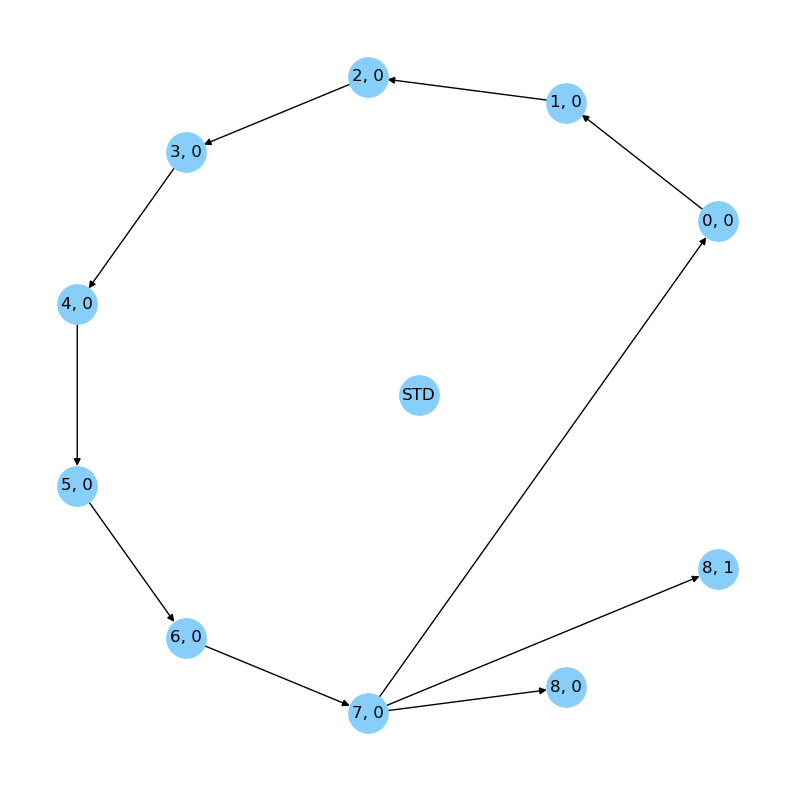

In [21]:
import pandas as pd
import numpy as np

G = nx.DiGraph()



data=[]
behavior_edges=[]
for i,behavior in enumerate(all_behaviors):
    for j,s in enumerate(behavior):
        state=HashableDict({key: s.name["State"].get(key,qv_none_both) for key in V})
        q=s.name["Q"]
        loc=s.name["loc"]
        cycle_loc=s.name["cycle_loc"]
        data.append([i,state,q,loc,cycle_loc])
        
        if j>0:
            behavior_edges.append([data[-2][1],state])

data_df=pd.DataFrame(data,columns=["Behavior_No","State","Q","loc","cycle_loc"])


behavior_nodes=data_df.drop_duplicates(subset=["State"])["State"].to_list()
#add cycle edges
for index, row in data_df.dropna(subset=["cycle_loc"])[["loc","cycle_loc"]].drop_duplicates().iterrows():
    loc1,loc2=row["loc"],row["cycle_loc"]
    state1=data_df[data_df["loc"]==loc1]["State"].iloc[-1]
    state2=data_df[data_df["loc"]==loc2]["State"].iloc[-1]
    behavior_edges.append([state1,state2])

G.add_nodes_from(behavior_nodes)
G.add_edges_from(behavior_edges)

#pos=nx.spectral_layout(G)
#pos=nx.shell_layout(G) #x
#pos=nx.random_layout(G)
pos=nx.circular_layout(G) #x
#pos=nx.kamada_kawai_layout(G) #x
#pos=nx.planar_layout(G) #x
#pos=nx.spring_layout(G,center=(0,0),k=2)

labels = {}
for i,node in enumerate(G.nodes()):
    labels[node] = data_df[data_df["State"]==node]["loc"].apply(lambda x: str(x).replace("(","").replace(")","")).iloc[0]

#change info for stationary behavior
stationary_state=HashableDict(stationary_behavior[0].name["State"])
pos[stationary_state]=np.array([0,0])
labels[stationary_state]="STD"

fig=plt.figure(figsize=(10,10))
#ax=fig.add_subplot(111)

# # Draw the graph in the first subplot
nx.draw_networkx(G, with_labels=True,arrows=True,pos=pos,node_size=800,node_color="lightskyblue",labels=labels) #labels
plt.box(False)
#plt.savefig('Document Figures/4osc_arm_sim_envisionment.png',bbox_inches='tight', pad_inches=0.075)
plt.show()